In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt


In [3]:
data = pd.read_csv('data_baru.csv')


In [4]:
data.columns

Index(['tgl/bln/thn', 'suhu ', 'kelembapan (%)', 'curah hujan(mm)',
       'tekanan(kPa)', 'kecepatang angin(m/s)'],
      dtype='object')

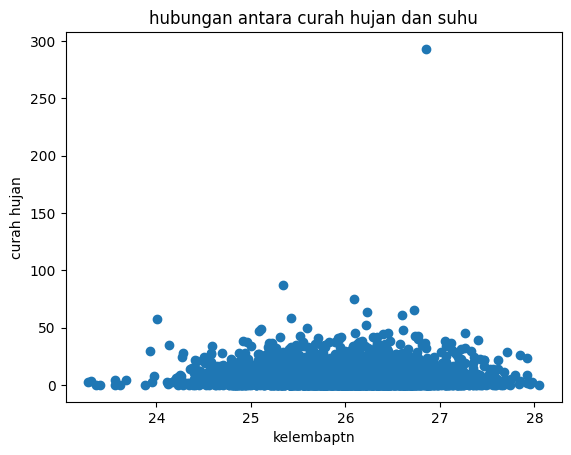

In [5]:
plt.scatter(data['suhu '],data['curah hujan(mm)'])
plt.xlabel("kelembaptn")
plt.ylabel("curah hujan")
plt.title("hubungan antara curah hujan dan suhu")
plt.show()



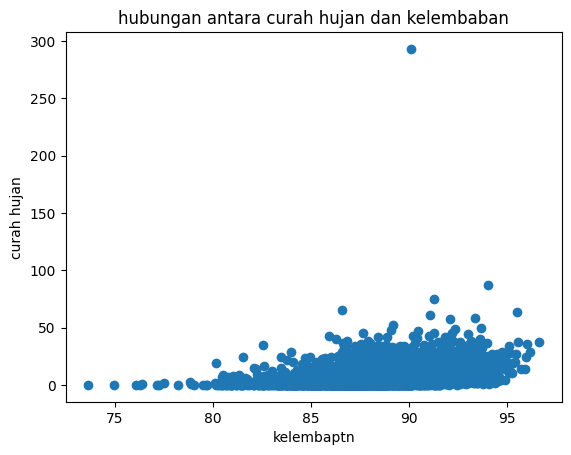

In [6]:
plt.scatter(data[ 'kelembapan (%)'],data['curah hujan(mm)'])
plt.xlabel("kelembaptn")
plt.ylabel("curah hujan")
plt.title("hubungan antara curah hujan dan kelembaban")
plt.show()

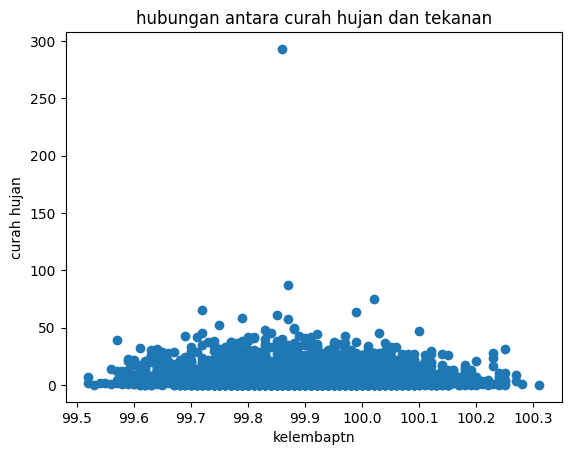

In [7]:
plt.scatter(data[ 'tekanan(kPa)'],data['curah hujan(mm)'])
plt.xlabel("kelembaptn")
plt.ylabel("curah hujan")
plt.title("hubungan antara curah hujan dan tekanan")
plt.show()

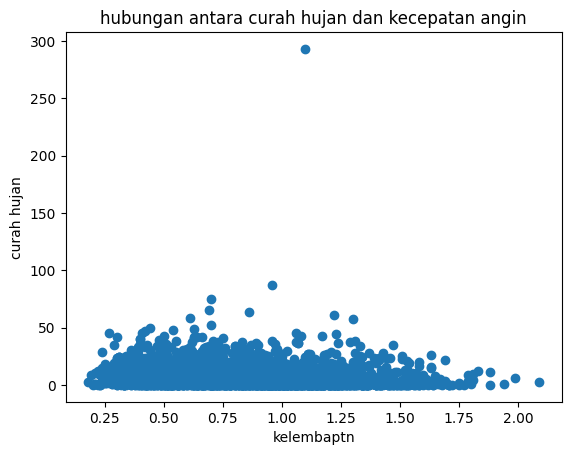

In [8]:
plt.scatter(data[ 'kecepatang angin(m/s)'],data['curah hujan(mm)'])
plt.xlabel("kelembaptn")
plt.ylabel("curah hujan")
plt.title("hubungan antara curah hujan dan kecepatan angin")
plt.show()

In [9]:
# # 2. Tampilkan sebagian isi data
# print(data.head())
# 3. Ambil fitur dan target
X = data[['kelembapan (%)','tekanan(kPa)' ]].values
Y = data['curah hujan(mm)'].values.reshape(-1, 1)
# 4. Normalisasi ke 0-1
scaler_X = MinMaxScaler()
scaler_Y = MinMaxScaler()
X_norm = scaler_X.fit_transform(X)
Y_norm = scaler_Y.fit_transform(Y)
# 5. Split data latih dan uji (70:30)
N = X_norm.shape[0]
idx_train = int(0.7 * N)
X_train = X_norm[:idx_train]
Y_train = Y_norm[:idx_train]
X_test = X_norm[idx_train:]


Y_test = Y_norm[idx_train:]
# 6. Membuat dan melatih JST
model = Sequential([
 Dense(2, input_dim=2, activation='sigmoid'),
 Dense(1000, activation='sigmoid'), # hidden layer
 Dense(1, activation='sigmoid') # output layer
])
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, Y_train, epochs=100, verbose=2)
# 7. Prediksi
Y_pred = model.predict(X_test)
# 8. Visualisasi hasil

c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
80/80 - 3s - 39ms/step - loss: 0.0079
Epoch 2/100
80/80 - 0s - 4ms/step - loss: 0.0015
Epoch 3/100
80/80 - 0s - 4ms/step - loss: 0.0014
Epoch 4/100
80/80 - 0s - 4ms/step - loss: 0.0014
Epoch 5/100
80/80 - 0s - 5ms/step - loss: 0.0012
Epoch 6/100
80/80 - 1s - 9ms/step - loss: 0.0011
Epoch 7/100
80/80 - 0s - 6ms/step - loss: 0.0011
Epoch 8/100
80/80 - 0s - 3ms/step - loss: 0.0011
Epoch 9/100
80/80 - 0s - 5ms/step - loss: 0.0011
Epoch 10/100
80/80 - 0s - 4ms/step - loss: 0.0011
Epoch 11/100
80/80 - 0s - 4ms/step - loss: 0.0011
Epoch 12/100
80/80 - 0s - 4ms/step - loss: 0.0011
Epoch 13/100
80/80 - 0s - 4ms/step - loss: 0.0011
Epoch 14/100
80/80 - 0s - 3ms/step - loss: 0.0011
Epoch 15/100
80/80 - 0s - 4ms/step - loss: 0.0011
Epoch 16/100
80/80 - 0s - 4ms/step - loss: 0.0011
Epoch 17/100
80/80 - 0s - 3ms/step - loss: 0.0011
Epoch 18/100
80/80 - 0s - 4ms/step - loss: 0.0011
Epoch 19/100
80/80 - 0s - 4ms/step - loss: 0.0011
Epoch 20/100
80/80 - 0s - 5ms/step - loss: 0.0011
Epoch 21

In [10]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
# Konversi test dan prediksi ke array numerik
actual = np.array(Y_test)
predicted = np.array(Y_pred)
# MAE
mae_value = mean_absolute_error(actual, predicted)

In [11]:
# MSE
mse_value = mean_squared_error(actual, predicted)
# RMSE
rmse_value = np.sqrt(mse_value)
# MAPE
mape_value = np.mean(np.abs((actual - predicted) / actual)) * 100
# Tampilkan hasil evaluasi
print(f"MAE : {mae_value:.4f}")
print(f"MSE : {mse_value:.4f}")
print(f"RMSE : {rmse_value:.4f}")


MAE : 0.0190
MSE : 0.0008
RMSE : 0.0288


C:\Users\USER\AppData\Local\Temp\ipykernel_328\1735318938.py:6: RuntimeWarning: divide by zero encountered in divide
  mape_value = np.mean(np.abs((actual - predicted) / actual)) * 100


In [12]:
eror=actual-predicted
print(eror)

[[ 0.01916663]
 [ 0.00783738]
 [-0.01297885]
 ...
 [-0.01058589]
 [-0.00221294]
 [ 0.00981565]]


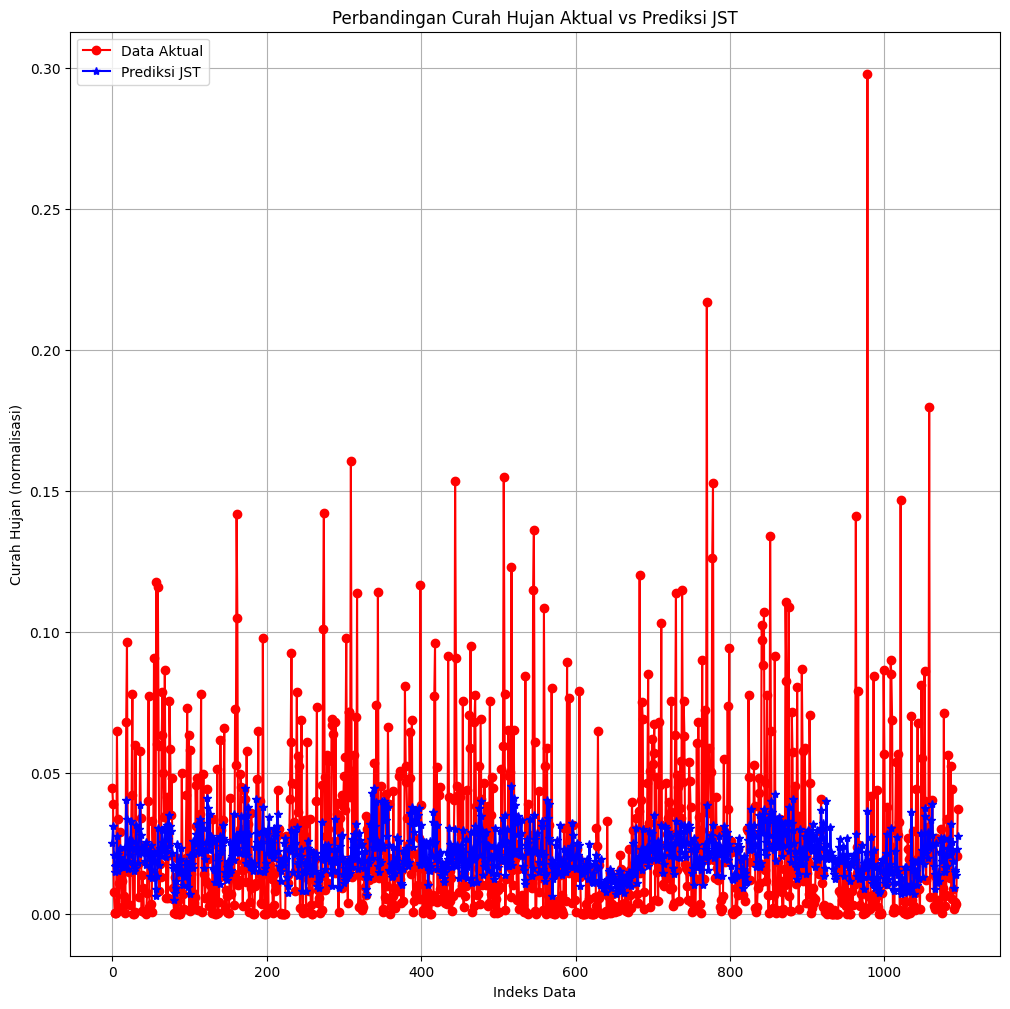

In [13]:
plt.figure(figsize=(12,12))
plt.plot(Y_test, 'r-o', label='Data Aktual')
plt.plot(Y_pred, 'b-*', label='Prediksi JST')
plt.legend()
plt.xlabel('Indeks Data')
plt.ylabel('Curah Hujan (normalisasi)')
plt.title('Perbandingan Curah Hujan Aktual vs Prediksi JST')
plt.grid(True)
plt.show()

In [14]:


# 3. Hilangkan spasi pada nama kolom
data.columns = data.columns.str.strip()

# 4. Ubah semua kolom ke numerik (jika perlu)
data = data.apply(pd.to_numeric, errors='coerce')

# 5. Hitung korelasi
korelasi = data.corr()

# 6. Cetak korelasi
print(korelasi)

                       tgl/bln/thn      suhu  kelembapan (%)  curah hujan(mm)  \
tgl/bln/thn                    NaN       NaN             NaN              NaN   
suhu                           NaN  1.000000       -0.395504        -0.042295   
kelembapan (%)                 NaN -0.395504        1.000000         0.316899   
curah hujan(mm)                NaN -0.042295        0.316899         1.000000   
tekanan(kPa)                   NaN -0.250189       -0.046529        -0.047427   
kecepatang angin(m/s)          NaN -0.295277        0.112480        -0.102845   

                       tekanan(kPa)  kecepatang angin(m/s)  
tgl/bln/thn                     NaN                    NaN  
suhu                      -0.250189              -0.295277  
kelembapan (%)            -0.046529               0.112480  
curah hujan(mm)           -0.047427              -0.102845  
tekanan(kPa)               1.000000               0.125841  
kecepatang angin(m/s)      0.125841               1.000000  


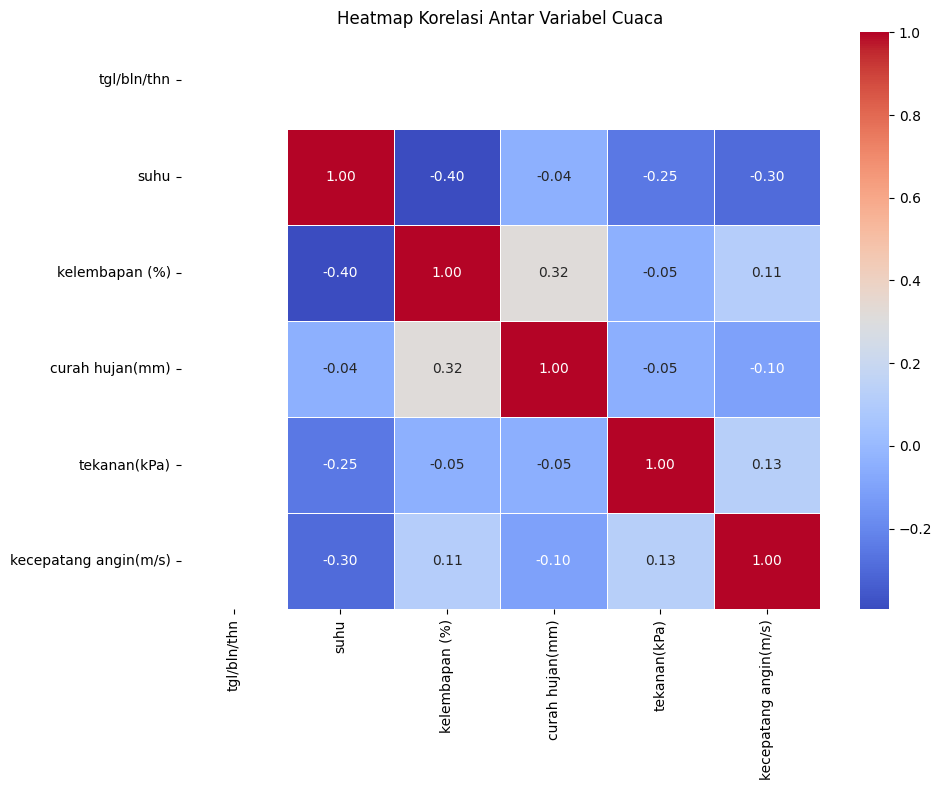

In [15]:
# Hitung matriks korelasi
corr_matrix = data.corr()

# Buat heatmap menggunakan seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap Korelasi Antar Variabel Cuaca')
plt.tight_layout()
plt.show()

In [16]:
data.describe()

tgl/bln/thn         suhu  kelembapan (%)  curah hujan(mm)  \
count          0.0  3652.000000     3652.000000      3652.000000   
mean           NaN    26.073138       88.505854         6.872133   
std            NaN     0.684244        2.921904         9.565441   
min            NaN    23.280000       73.640000         0.000000   
25%            NaN    25.620000       86.740000         1.050000   
50%            NaN    26.090000       88.625000         3.950000   
75%            NaN    26.550000       90.510000         9.340000   
max            NaN    28.050000       96.630000       293.220000   

       tekanan(kPa)  kecepatang angin(m/s)  
count   3652.000000            3652.000000  
mean      99.886265               0.827982  
std        0.125080               0.318644  
min       99.520000               0.180000  
25%       99.800000               0.580000  
50%       99.880000               0.800000  
75%       99.970000               1.050000  
max      100.310000               2.090000